In [41]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

In [ ]:
image_path = "E:/reusable-trash-images/selectstar-reusable-trash-image/3403540.jpg"

image = cv2.imread(image_path, cv2.IMREAD_COLOR)
print(image[0][0])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(image[0][0])

In [2]:
data = pd.read_csv("../data(S1).csv", index_col=False)
data

,imagePath,label,Shape_num,width,height,point1_x,point1_y,point2_x,point2_y
0,3403540,pack,1,2272,4032,926,1682,1248,2284
1,3403658,can,1,2272,4032,999,1701,1295,2224
2,3403788,glass,1,4032,2272,1435,972,2672,1185
3,3403841,paper,1,2268,4032,860,1663,1515,2419
4,3403871,paper,1,2268,4032,861,1683,1493,2445
...,...,...,...,...,...,...,...,...,...
12470,custom_00227,vinyl,1,4032,2268,1312,421,2198,1569
12471,custom_00230,vinyl,1,2268,4032,700,1559,1639,2543
12472,custom_00285,glass,1,2268,4032,630,2882,1380,3243
12473,custom_00287,glass,1,2268,4032,621,2878,1372,3240


In [ ]:
data = pd.read_csv("../data(S1_pack).csv", index_col=False)
data

In [5]:
len(ratio_list)

758

In [7]:
ratio_list=[]
for i in range(len(data.values)):
    
    name = str(data.values[i][0])
    image_path = "E:/reusable-trash-images/selectstar-reusable-trash-image/" + name + ".jpg"
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    x = data.values[i][5]
    y = data.values[i][6]
    w = data.values[i][7]
    h = data.values[i][8]
    dx = np.abs(w-x)
    dy = np.abs(h-y)
    s = dx*dy
    size = np.int32(image.size/3)
    ratio = s/size*100
    print(name,s,size,ratio)
    ratio_list.append(ratio)



3403540 193844 9160704 2.116038243348983
3403658 154808 9160704 1.689913788285267
3403788 263481 9160704 2.8762090773809526
3403841 495180 9144576 5.415013227513228
3403871 481584 9144576 5.266334929033341
3403971 840224 9144576 9.18822261414854
3404044 584748 11943936 4.895773051697531
3404065 148694 9144576 1.6260349304330786
3404070 175380 9144576 1.91785819265978
3404106 480704 9144576 5.25671173819322
3404111 1217690 9144576 13.315980970577531
3404138 110376 9144576 1.2070105820105819
3404188 267883 9144576 2.9294195816186557
3404200 180440 9160704 1.9697176112228927
3404245 175066 9144576 1.9144244632009182
3404247 104960 9160704 1.1457634697071317
3404277 695040 9144576 7.600571092634585
3404282 1243180 9144576 13.594725441616976
3404290 61752 9160704 0.6740966633132126
3404346 833490 9144576 9.114583333333332
3404349 305293 9144576 3.338514546765208
3404385 254282 9144576 2.7806866059180875
3404388 969984 9144576 10.607205845301083
3404394 140812 9144576 1.5398417597491671
3404

In [8]:
ratio_list = np.round(ratio_list,2)
data['ascept_ratio'] = ratio_list

data.to_csv("./data(S1_ratio).csv", index=False)

In [ ]:
image_path = "E:/reusable-trash-images/selectstar-reusable-trash-image/3404044.jpg"

image= cv2.imread(image_path, cv2.IMREAD_COLOR)
image_arr = np.array(image)
image_arr.shape

In [ ]:
image_path = "E:/reusable-trash-images/selectstar-reusable-trash-image/3404044.jpg"

image= cv2.imread(image_path, cv2.IMREAD_COLOR)
image = image.astype(np.uint16)

In [ ]:
x= data.values[0][5] # 좌상단 x좌표
y= data.values[0][6] # 좌상단 y좌표
w= data.values[0][7] # 우하단 x좌표
h= data.values[0][8] # 우하단 y좌표

image[y:h+1,x:w+1,:]=256
bg = image[image[:,:,:]!=256]
bg_pixel= np.average(bg.reshape(-1,3),axis=0).round().astype(np.uint8)

In [ ]:
x= data.values[0][5] # 좌상단 x좌표
y= data.values[0][6] # 좌상단 y좌표
w= data.values[0][7] # 우하단 x좌표
h= data.values[0][8] # 우하단 y좌표

image[y:h+1,x:w+1,:]=256
bg = image[image[:,:,:]!=256]
bg_pixel= np.average(bg.reshape(-1,3),axis=0).round().astype(np.uint8)

In [13]:
import cv2
BgMeanR = []
BgMeanG = []
BgMeanB = []

for i in range(len(data.values)):
    print(f"{i}번째 진행 중")
    image_path = "E:/reusable-trash-images/selectstar-reusable-trash-image/"
    name = str(data.values[i][0])
    path = image_path + name + ".jpg"
    image= cv2.imread(path, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = image.astype(np.uint16)
    x = data.values[i][5] # 좌상단 x좌표
    y = data.values[i][6] # 좌상단 y좌표
    w = data.values[i][7] # 우하단 x좌표
    h = data.values[i][8] # 우하단 y좌표
    image[y:h+1,x:w+1,:]=256
    e_temp = np.average(image[image[:,:,:]!=256].reshape(-1,3),axis=0).round().astype(np.uint8)
    BgMeanR.append(e_temp[0])
    BgMeanG.append(e_temp[1])
    BgMeanB.append(e_temp[2])

0번째 진행 중
1번째 진행 중
2번째 진행 중
3번째 진행 중
4번째 진행 중
5번째 진행 중
6번째 진행 중
7번째 진행 중
8번째 진행 중
9번째 진행 중
10번째 진행 중
11번째 진행 중
12번째 진행 중
13번째 진행 중
14번째 진행 중
15번째 진행 중
16번째 진행 중
17번째 진행 중
18번째 진행 중
19번째 진행 중
20번째 진행 중
21번째 진행 중
22번째 진행 중
23번째 진행 중
24번째 진행 중
25번째 진행 중
26번째 진행 중
27번째 진행 중
28번째 진행 중
29번째 진행 중
30번째 진행 중
31번째 진행 중
32번째 진행 중
33번째 진행 중
34번째 진행 중
35번째 진행 중
36번째 진행 중
37번째 진행 중
38번째 진행 중
39번째 진행 중
40번째 진행 중
41번째 진행 중
42번째 진행 중
43번째 진행 중
44번째 진행 중
45번째 진행 중
46번째 진행 중
47번째 진행 중
48번째 진행 중
49번째 진행 중
50번째 진행 중
51번째 진행 중
52번째 진행 중
53번째 진행 중
54번째 진행 중
55번째 진행 중
56번째 진행 중
57번째 진행 중
58번째 진행 중
59번째 진행 중
60번째 진행 중
61번째 진행 중
62번째 진행 중
63번째 진행 중
64번째 진행 중
65번째 진행 중
66번째 진행 중
67번째 진행 중
68번째 진행 중
69번째 진행 중
70번째 진행 중
71번째 진행 중
72번째 진행 중
73번째 진행 중
74번째 진행 중
75번째 진행 중
76번째 진행 중
77번째 진행 중
78번째 진행 중
79번째 진행 중
80번째 진행 중
81번째 진행 중
82번째 진행 중
83번째 진행 중
84번째 진행 중
85번째 진행 중
86번째 진행 중
87번째 진행 중
88번째 진행 중
89번째 진행 중
90번째 진행 중
91번째 진행 중
92번째 진행 중
93번째 진행 중
94번째 진행 중
95번째 진행 중
96번째 진행 중
97번째 진행 중
98번째 진행 중
99번째 진행 중
100번째 진행 중

In [15]:
data['BgMeanR'] = BgMeanR
data['BgMeanG'] = BgMeanG
data['BgMeanB'] = BgMeanB

data.to_csv('./data(S1_Done).csv', index=False)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2


In [3]:
data = pd.read_csv('./data(S1_Done).csv', index_col=False)

In [99]:
data

,imagePath,label,Shape_num,width,height,point1_x,point1_y,point2_x,point2_y,ascept_ratio,BgMeanR,BgMeanG,BgMeanB
0,3403540,pack,1,2272,4032,926,1682,1248,2284,2.12,169,164,158
1,3403658,can,1,2272,4032,999,1701,1295,2224,1.69,167,162,157
2,3403788,glass,1,4032,2272,1435,972,2672,1185,2.88,169,164,156
3,3403841,paper,1,2268,4032,860,1663,1515,2419,5.42,125,119,113
4,3403871,paper,1,2268,4032,861,1683,1493,2445,5.27,151,146,139
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12470,custom_00227,vinyl,1,4032,2268,1312,421,2198,1569,11.12,145,137,119
12471,custom_00230,vinyl,1,2268,4032,700,1559,1639,2543,10.10,140,139,135
12472,custom_00285,glass,1,2268,4032,630,2882,1380,3243,2.96,121,123,115
12473,custom_00287,glass,1,2268,4032,621,2878,1372,3240,2.97,120,122,117


In [51]:
w,h = zoom(5,5,6,9,75)
print(w,h)

TypeError: zoom() missing 2 required positional arguments: 'w' and 'size'

In [52]:
x = 9-8
y = 9-8
print(4)
print(4/(x*y)*100)


4
400.0


In [110]:
data.values[0]
w = data.values[0][3]
h = data.values[0][4]
x1 = data.values[0][5]
y1 = data.values[0][6]
x2= data.values[0][7]
y2 = data.values[0][8]

x,y = zoom(x1,y1,x2,y2,h,w,0.75)
print(x1,x2,y1,y2)
print(x,y)


926 1248 1682 2284
677 382.0


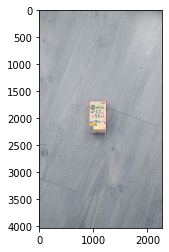

In [128]:
image = 'E:/reusable-trash-images/selectstar-reusable-trash-image/3403540.jpg'
img = cv2.imread(image,cv2.IMREAD_COLOR)
cv2.rectangle(img,(x1,y1),(x2,y2),255,3)
plt.imshow(img)
plt.show()

(1554, 832, 3)


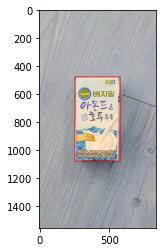

In [130]:
pt1_x = x1-255
pt1_y = y1-476
pt2_x = x2+255
pt2_y = y2+476

roi = img[pt1_y:pt2_y,pt1_x:pt2_x]
print(roi.shape)

cv2.imwrite(".85%.jpg",roi)
plt.imshow(roi)
plt.show()

In [132]:
dx = np.abs((x2-x1))
dy = np.abs((y2-y1))
s = dx*dy
s1 = 1554*832
print(s)
print(s1)
print((s/s1)*100)

193844
1292928
14.992636867636868


(2786, 1011, 3)
193844
2816646
6.882085998737505


ValueError: zero-size array to reduction operation minimum which has no identity

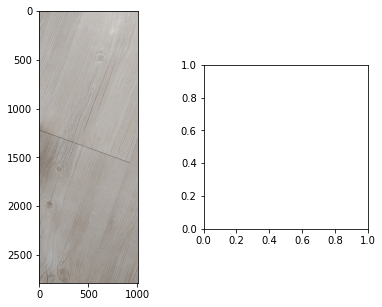

In [76]:
data.values[0]
w = data.values[0][3]
h = data.values[0][4]
x1 = data.values[0][5]
y1 = data.values[0][6]
x2= data.values[0][7]
y2 = data.values[0][8]
dx = np.abs((x2-x1))
dy = np.abs((y2-y1))
plt.figure(figsize=(10,5))
for i in range(1,4):
    plt.subplot(1,3,i)
    x,y = zoom(x1,y1,x2,y2,h,w,25*i)
    pt1_x = x1-x
    pt1_y = y1-y
    pt2_x = x2+x
    pt2_y = y2+y
    roi = img[pt1_y:pt2_y,pt1_x:pt2_x]
    plt.imshow(roi)
    print(roi.shape)
    s = dx*dy
    s1 = roi.shape[0]*roi.shape[1]
    print(s)
    print(s1)
    print((s/s1)*100)
plt.show()